[Here is our link to download our datast](https://www.kaggle.com/datasets/tarekmuhammed/patients-data-for-medical-field/data)

We did not and do not plan to use any libraries not provided to us within the scope of this class.

In [1]:
!git clone https://github.com/Latortuga13/CSE151Diabetes.git

Cloning into 'CSE151Diabetes'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 2), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 32.21 MiB | 9.74 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
from re import A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
data = pd.read_excel("CSE151Diabetes/Patients Data ( Used for Heart Disease Prediction ).xlsx")

In [4]:
data

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1


In [5]:
# There is no missing data in our dataset
# Pre processing is done
data.isnull().sum()

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [7]:
# Removing Patient ID since it irrelevant to data
data_clean = data.drop("PatientID", axis=1)
dSample = data_clean.sample(frac=0.01, random_state=42, axis=0)
dSample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2376 entries, 39973 to 32459
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      2376 non-null   object 
 1   Sex                        2376 non-null   object 
 2   GeneralHealth              2376 non-null   object 
 3   AgeCategory                2376 non-null   object 
 4   HeightInMeters             2376 non-null   float64
 5   WeightInKilograms          2376 non-null   float64
 6   BMI                        2376 non-null   float64
 7   HadHeartAttack             2376 non-null   int64  
 8   HadAngina                  2376 non-null   int64  
 9   HadStroke                  2376 non-null   int64  
 10  HadAsthma                  2376 non-null   int64  
 11  HadSkinCancer              2376 non-null   int64  
 12  HadCOPD                    2376 non-null   int64  
 13  HadDepressiveDisorder      2376 non-null   int64

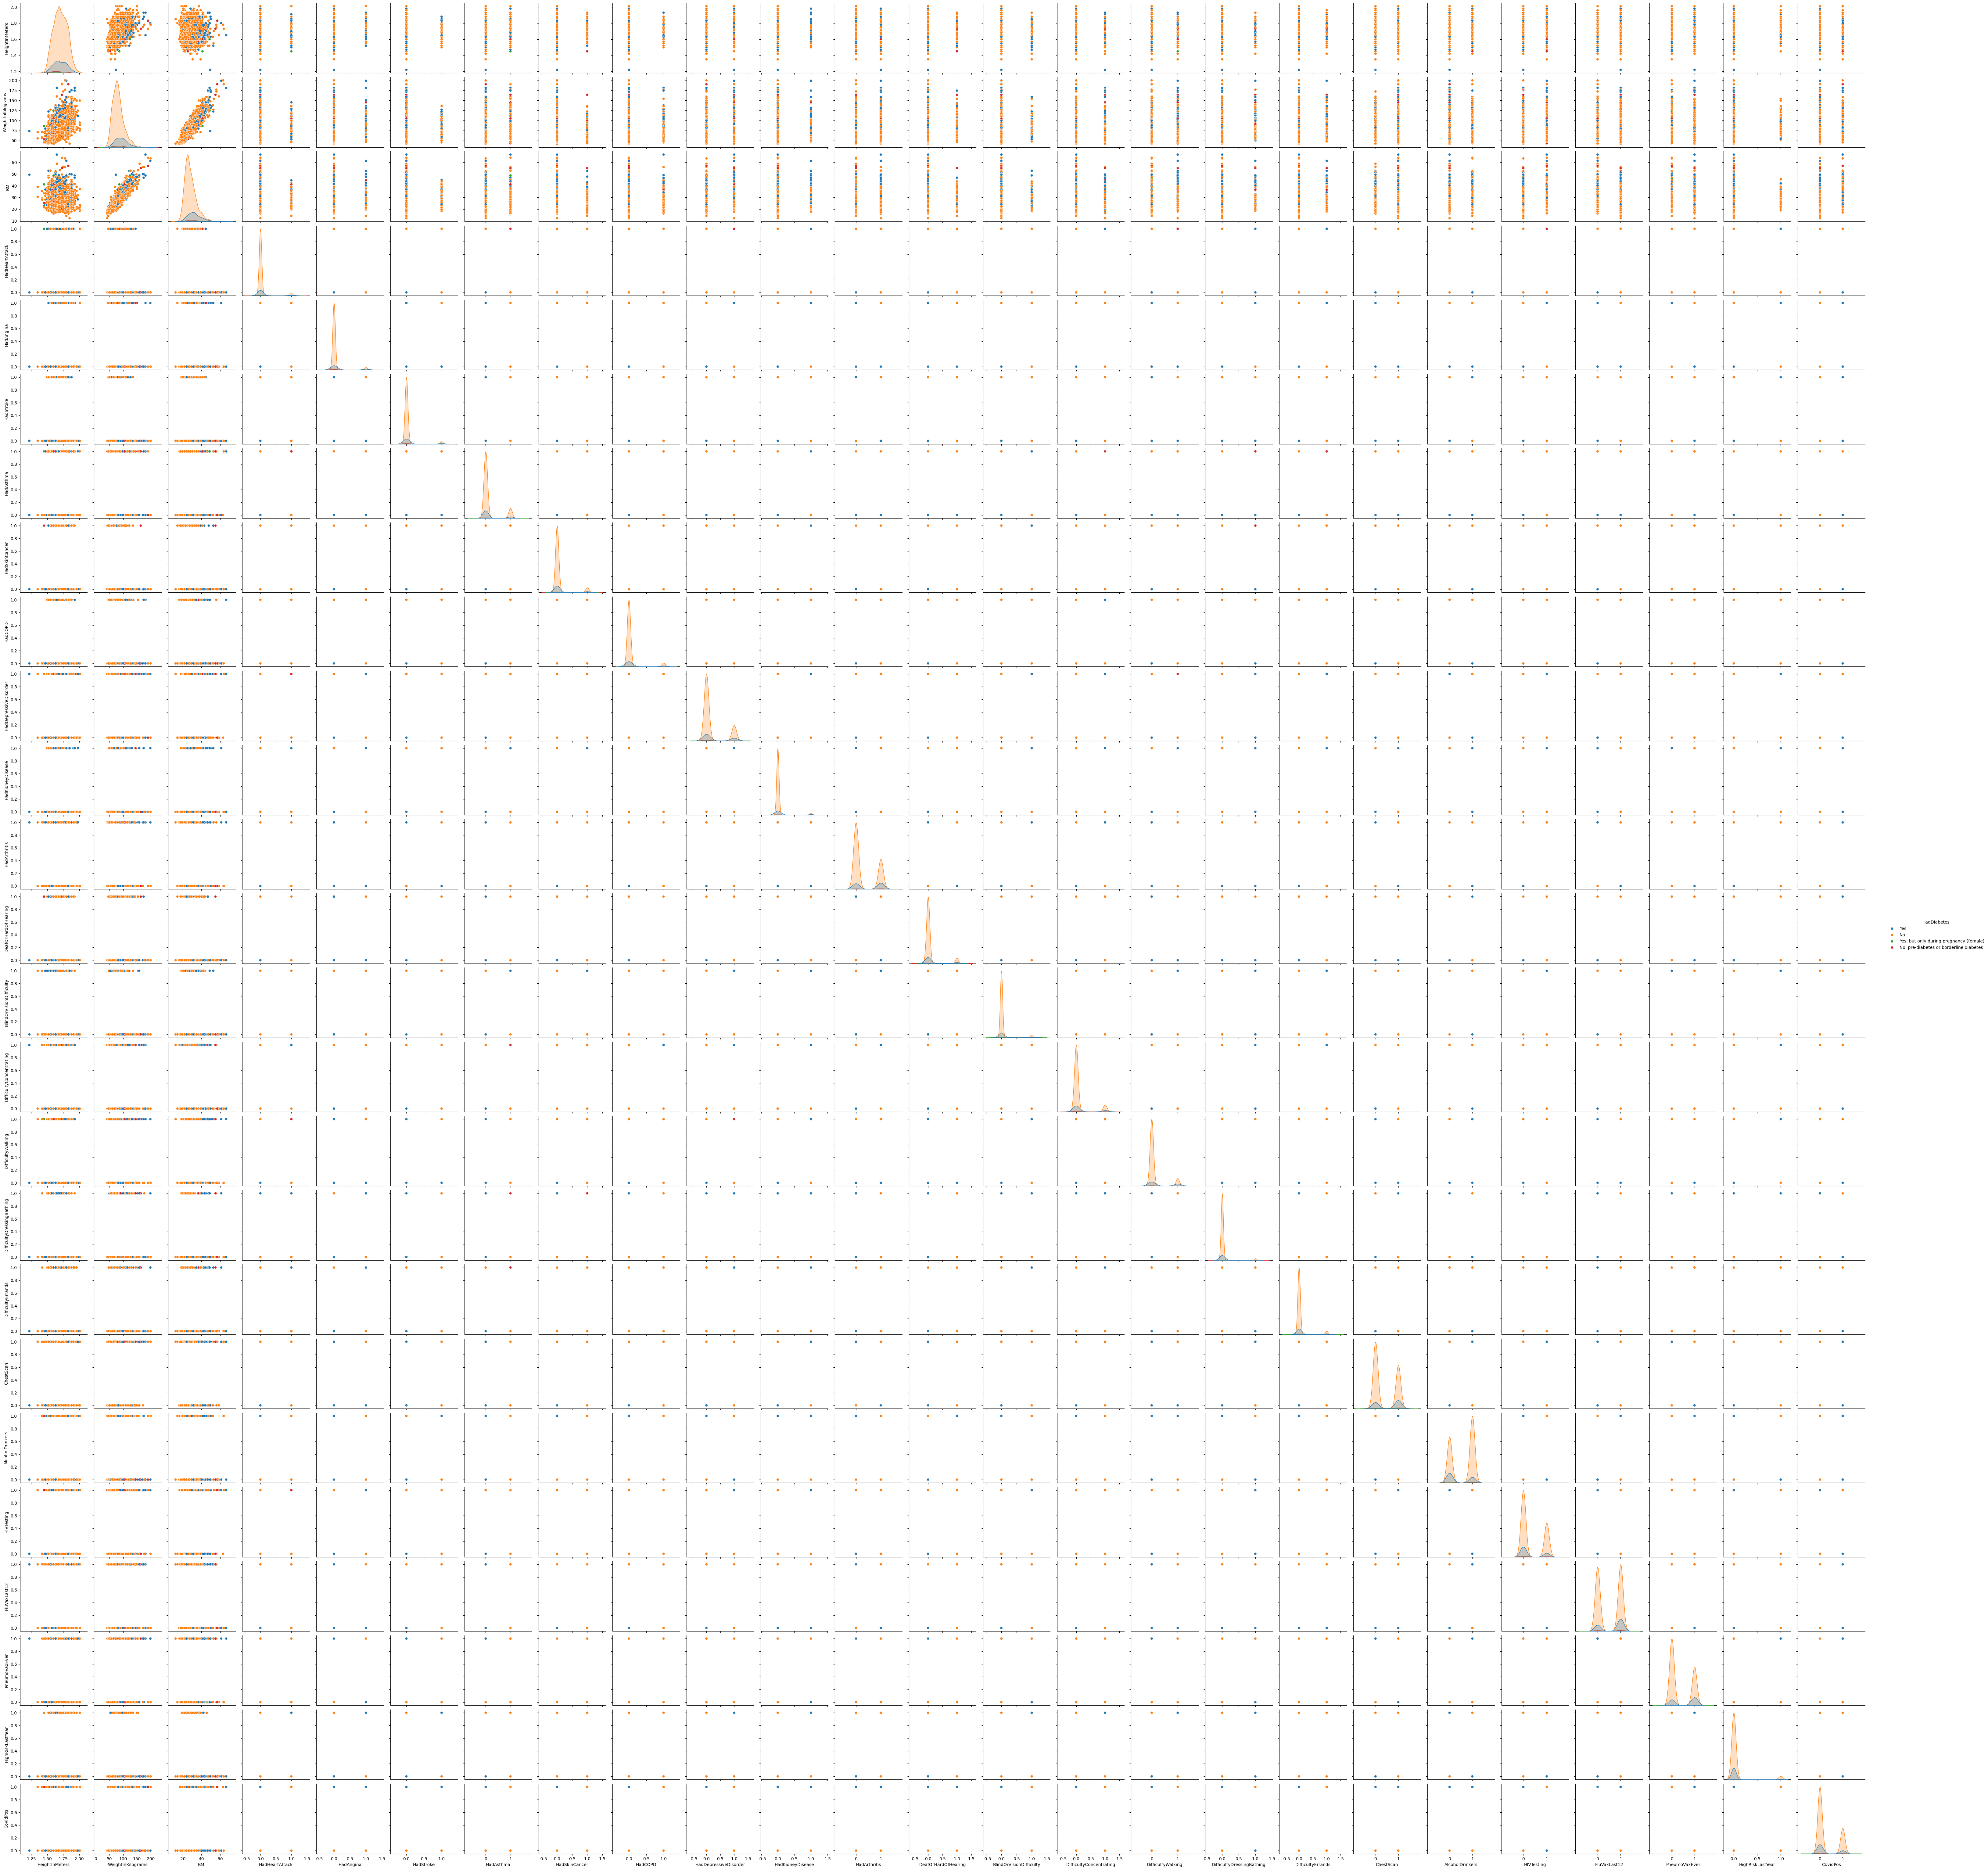

In [8]:
sns.pairplot(dSample, hue="HadDiabetes")